# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]
num_data2 = data2.shape[0]

x1 = np.zeros(num_data1)
y1 = np.zeros(num_data1)
label1   = np.zeros(num_data1)

for i in range(num_data1):
    x1[i]  = data1[i,0]
    y1[i]  = data1[i,1]
    label1[i]    = data1[i,2]
    
    
x2 = np.zeros(num_data2)
y2 = np.zeros(num_data2)
label2   = np.zeros(num_data2)

for i in range(num_data2):
    x2[i]  = data2[i,0]
    y2[i]  = data2[i,1]
    label2[i]    = data2[i,2]
    
xy_data1 = np.vstack((x1, y1)).T
xy_data2 = np.vstack((x2, y2)).T


# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

## define the feature function for each data to obtain the best accuracy

In [3]:
def feature_function1(x, y):
    num_data = x.shape[0]
    first = np.ones(num_data)
    feature = np.column_stack([first, x, y, x*x, x*y, y*y])
    return feature
feature = feature_function1(x1, y1)
print(feature.shape)

(1000, 6)


In [4]:
from math import sin
def feature_function2(x, y):     
    num_data = x.shape[0]
    first = np.ones(num_data)
    sinX = np.zeros(num_data)
    for i in range(num_data):
        sinX[i]  = sin(x[i])
    feature = np.column_stack([first, x, y, sinX])
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [5]:
def regression_function(theta, feature):
    value = np.dot(feature, theta)
    return value

## define sigmoid function with input $x$

In [6]:
def logistic_function(x):
    for _ in range(len(x)) :
        z = 1/(1+np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [7]:
def compute_loss_feature(theta, feature, label):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    loss = (-label * np.log(h) - (1 - label) * np.log(1 - h)).mean()
    return loss

## define gradient vector for the model parameters $\theta$

In [8]:
def compute_gradient_feature(theta, feature, label):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    X = feature
    gradient = np.dot(X.T, (h - label)) / label.shape[0]
    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    predict_label = np.where(h.T>=0.5, 1, 0)
    correctNum = 0
    for i in range(0, len(label)) :
        if (label[i] == predict_label[i]) :
            correctNum += 1
    accuracy = correctNum / len(label)
    return accuracy

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 100         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
theta1           = np.array((0, 0, 0, 0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta2           = np.array((0, 0, 0, 0))
theta1_iteration = np.zeros((num_iteration, theta1.size))
loss1_iteration  = np.zeros(num_iteration)
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss2_iteration  = np.zeros(num_iteration)
feature1 = feature_function1(x1, y1)
feature2 = feature_function2(x2, y2)

In [11]:
for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, label1)
    loss1 = compute_loss_feature(theta1, feature1, label1)
    theta1_iteration[i] = theta1
    loss1_iteration[i] = loss1
    print("iteration = %4d, loss = %5.5f" % (i, loss1))
print("###########################################################")
for i in range(num_iteration):
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, label2)
    loss2 = compute_loss_feature(theta2, feature2, label2)
    theta2_iteration[i] = theta2
    loss2_iteration[i] = loss2
    print("iteration = %4d, loss = %5.5f" % (i, loss1))
    
theta1_optimal = theta1
theta2_optimal = theta2

iteration =    0, loss = 0.72428
iteration =    1, loss = 0.57369
iteration =    2, loss = 0.54468
iteration =    3, loss = 0.52980
iteration =    4, loss = 0.51470
iteration =    5, loss = 0.50205
iteration =    6, loss = 0.48955
iteration =    7, loss = 0.47822
iteration =    8, loss = 0.46716
iteration =    9, loss = 0.45680
iteration =   10, loss = 0.44675
iteration =   11, loss = 0.43718
iteration =   12, loss = 0.42794
iteration =   13, loss = 0.41906
iteration =   14, loss = 0.41050
iteration =   15, loss = 0.40224
iteration =   16, loss = 0.39427
iteration =   17, loss = 0.38657
iteration =   18, loss = 0.37913
iteration =   19, loss = 0.37193
iteration =   20, loss = 0.36497
iteration =   21, loss = 0.35823
iteration =   22, loss = 0.35170
iteration =   23, loss = 0.34539
iteration =   24, loss = 0.33927
iteration =   25, loss = 0.33334
iteration =   26, loss = 0.32759
iteration =   27, loss = 0.32202
iteration =   28, loss = 0.31662
iteration =   29, loss = 0.31137
iteration 

## compute accuracy of the classifiers

In [12]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)
print(accuracy_classifier1)
print(accuracy_classifier2)

0.998
0.853


## plot the results

In [34]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [35]:
def plot_data(point_x, point_y, label):
    plt.figure(figsize=(8,8))

    plt.title('data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data1) :
        x = point_x[i]
        y = point_y[i]
        if label[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    plt.scatter(xx,yy,c='blue', label = 'Class = 0')
    plt.scatter(xxx,yyy,c='red', label = 'Class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [36]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    thetaT = theta_iteration.T
    plt.plot(thetaT[0], '-', color = 'red', label = 'theta0')
    plt.plot(thetaT[1], '-', color = 'green', label = 'theta1')
    plt.plot(thetaT[2], '-', color = 'blue', label = 'theta2')
    plt.plot(thetaT[3], '-', color = 'black', label = 'theta3')
    if len(thetaT) > 4 :
        plt.plot(thetaT[4], '-', color = 'orange', label = 'theta4')
        plt.plot(thetaT[5], '-', color = 'skyblue', label = 'theta5')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

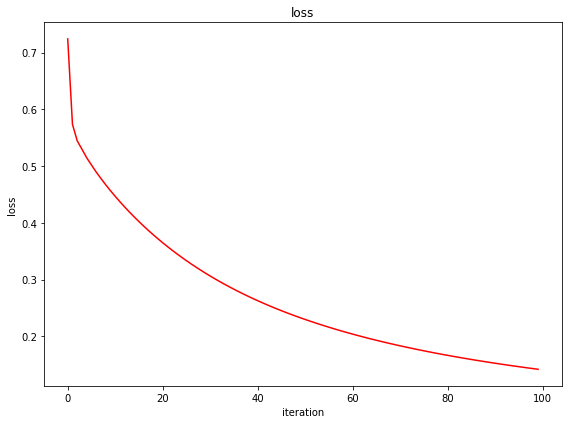

In [37]:
plot_loss_curve(loss1_iteration)

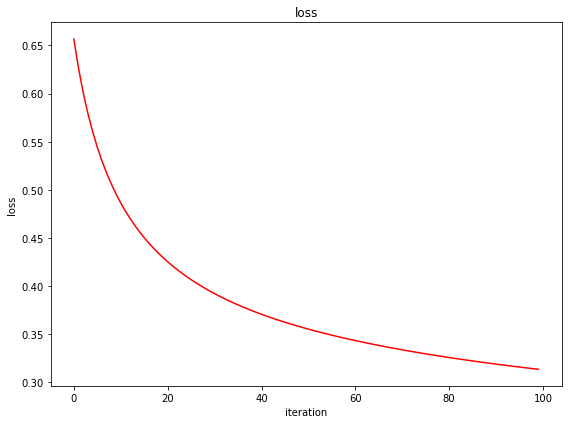

In [38]:
plot_loss_curve(loss2_iteration)

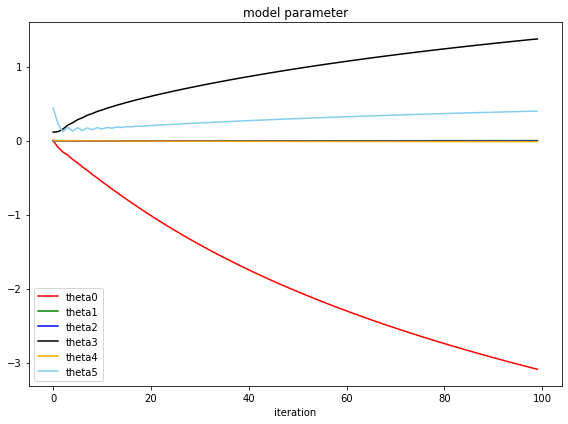

In [39]:
plot_model_parameter(theta1_iteration)

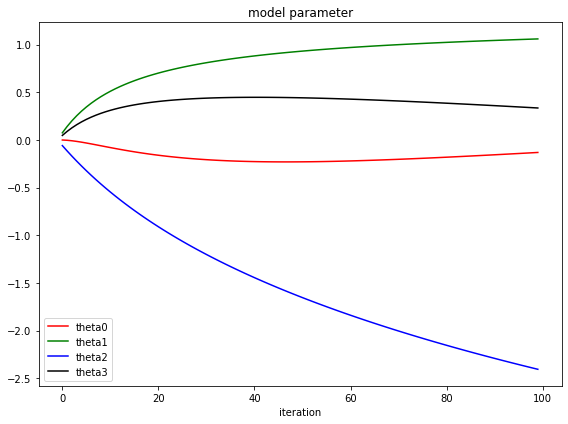

In [40]:
plot_model_parameter(theta2_iteration)

In [41]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [42]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [43]:
plot_classifier1(data1, theta1_optimal)

<Figure size 576x576 with 0 Axes>

In [44]:
plot_classifier2(data2, theta2_optimal)

<Figure size 576x576 with 0 Axes>

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

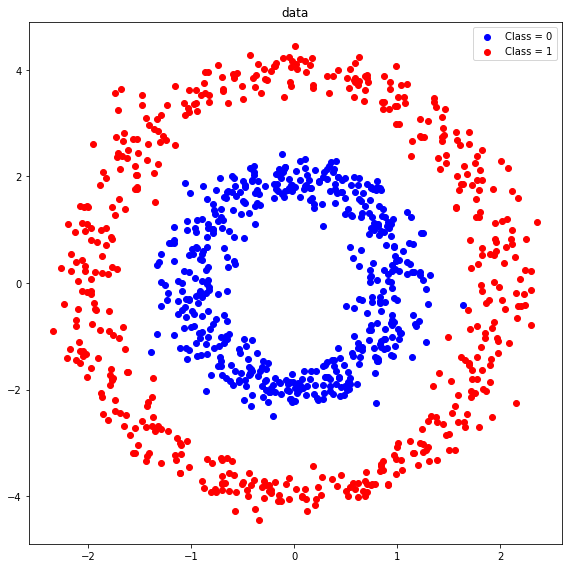

In [24]:
plot_data(x1,y1,label1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

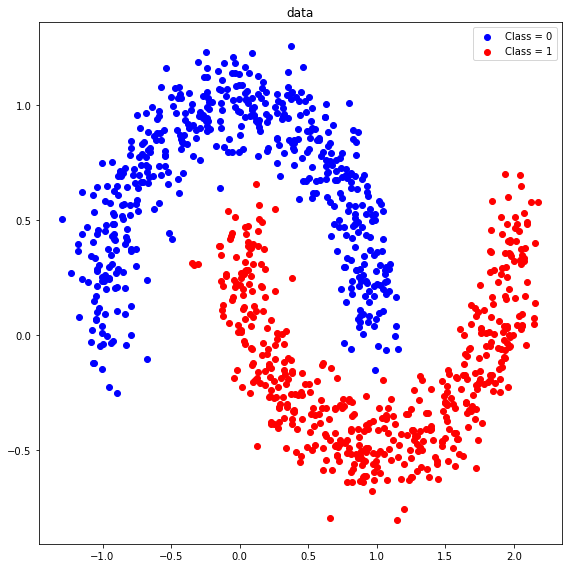

In [25]:
plot_data(x2,y2,label2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

In [26]:
plot_model_parameter(theta1_iteration)

<Figure size 576x432 with 0 Axes>

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

In [27]:
plot_model_parameter(theta2_iteration)

<Figure size 576x432 with 0 Axes>

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

In [28]:
plot_loss_curve(loss1_iteration)

<Figure size 576x432 with 0 Axes>

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

In [29]:
plot_loss_curve(loss2_iteration)

<Figure size 576x432 with 0 Axes>

### # 07. plot the classifier with the given data points superimposed for data1

In [30]:
plot_classifier1(data1, theta1_optimal)

<Figure size 576x576 with 0 Axes>

### # 08. plot the classifier with the given data points superimposed for data2

In [31]:
plot_classifier2(data2, theta2_optimal)

<Figure size 576x576 with 0 Axes>

### # 09. print out the accuracy of the obtained classifier1 for data1

In [32]:
print(accuracy_classifier1)

0.998


### # 10. print out the accuracy of the obtained classifier2 for data1

In [33]:
print(accuracy_classifier2)

0.853
